In [1040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [1041]:
dataset = pd.read_csv('breast.csv')

In [1042]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1043]:
dataset['target'] = dataset.diagnosis
dataset = dataset.drop(columns='diagnosis',axis=1)
dataset = dataset.drop(columns='id',axis=1)

dataset.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [1044]:
dataset.shape

(569, 31)

In [1045]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [1046]:
dataset.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

In [1047]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1048]:
dataset['target'].value_counts()
dataset['target'] = dataset['target'].replace(['B','M'],[1,0])
#dataset['target'].value_counts()
#dataset['target'] = pd.to_numeric(dataset['target'])

In [1049]:
dataset['target'].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [1050]:
X = dataset.drop(columns='target',axis=1)
Y = dataset['target']
print(X)
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [1051]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


**Standardize the data**

If we get less accuracy then we standardize the data

In [1052]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train.values)
X_test_std = scaler.fit_transform(X_test.values)

In [1053]:
import tensorflow as tf
tf.random.set_seed(3) #to get random value for weight and bias of tensorflow
from tensorflow import keras


In [1054]:
#Creating the NN layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), #Flatten will converte the input into single dim array
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid'), #2 bcz we have only two classes
])

In [1055]:
#Compliling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # when we have target as 0,1,2....then we use sparse, if we have onehot encoding then we use categorical_entropy without sparse
              metrics = ['accuracy'])

man - 1
women - 0
animal - 2
then we use sparse_categorical_crossentropy

if we have
man - [1,0,0]
women - [0,1,0]
animal - [0,0,1]
this is one hot encoding
here we use categorical_crossentropy

In [1056]:
# training the NN
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=10)


Epoch 1/10


13/13 [==============================] - 1s 21ms/step - loss: 2.8962 - accuracy: 0.6650 - val_loss: 1.2226 - val_accuracy: 0.7391
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 1.1221 - accuracy: 0.7531 - val_loss: 0.5095 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.8264 - val_loss: 0.0905 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.8606 - val_loss: 0.1883 - val_accuracy: 0.8913
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5284 - accuracy: 0.8435 - val_loss: 0.1691 - val_accuracy: 0.8913
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.9022 - val_loss: 0.3931 - val_accuracy: 0.8696
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.8337 - val_loss: 0.1167 - val_accuracy: 0.9565
Epoch 8/10
13/13 [============

Validation Data: This subset is used during training to assess the model’s performance.It helps prevent overfitting by monitoring how well the model generalizes to unseen examples.

Test Data: After training, the model is evaluated on this separate dataset to estimate its performance on new, unseen data.

The validation_split parameter specifically deals with the division between training and validation data

In [1057]:
#train model on standardize data
history2 = model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)#,batch_size=

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.6080 - accuracy: 0.7262 - val_loss: 0.4656 - val_accuracy: 0.8913
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.8973 - val_loss: 0.2499 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2276 - accuracy: 0.9193 - val_loss: 0.1549 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9560 - val_loss: 0.1097 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.0908 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9756 - val_loss: 0.0777 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9853 - val_loss: 0.0685 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

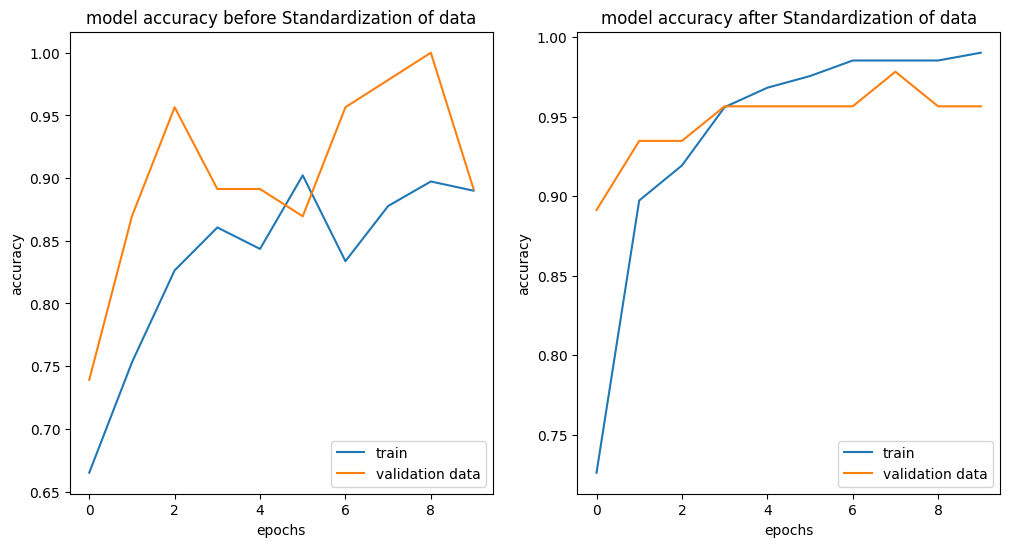

In [1058]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.title('model accuracy before Standardization of data')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train','validation data'],loc= 'lower right')

plt.subplot(1,2,2)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])


plt.title('model accuracy after Standardization of data')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train','validation data'],loc= 'lower right')


**Loss Function**

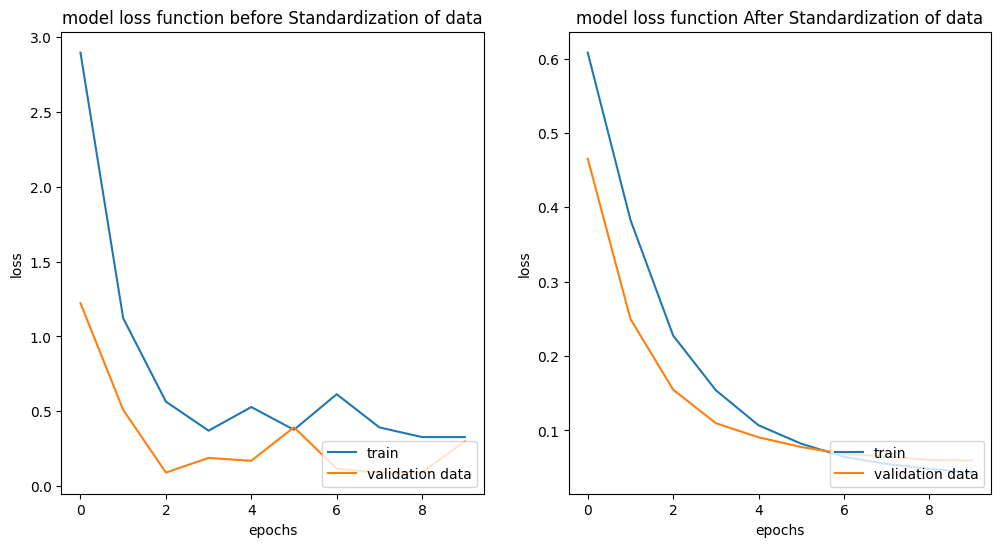

In [1059]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss function before Standardization of data')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train','validation data'],loc= 'lower right')

plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss function After Standardization of data')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train','validation data'],loc= 'lower right')



**Accuracy of Model on Test data**

In [1060]:
loss , accuracy = model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9737


In [1061]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [1062]:
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])
#first data point represents probablity of 0 and second one is of 1

4/4 [==============================] - 0s 0s/step
(114, 2)
[0.07247927 0.77279216]


**model.predict() gives the probability of each class**

*The one who has higher probab is the more likely predicted outcome*

In [1063]:
#argmax function eg:-
list = [10,30,40]
index_ofMax = np.argmax(list)
print(index_ofMax)

#so we have probablity of 0 and 1 in list
#if value at 0th index is higher which means its more likely to be 0 or else 1

probab = [0.23423,0.456564]
index_ofMax = np.argmax(probab)
print(index_ofMax)


2
1


In [1064]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(pd.DataFrame(Y_pred).head())
print(Y_pred_labels)

          0         1
0  0.072479  0.772792
1  0.204911  0.703178
2  0.000497  0.977366
3  0.999912  0.000028
4  0.263680  0.678110
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [1065]:
#take input
input_data =(11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173)
#Change the input to numpy array
input_data = np.array(input_data)
print(input_data.shape)

#reshape the array as we are predicting for one data point
input_data = input_data.reshape(1,-1)
#Standardize the data
input_data = scaler.transform(input_data)

#making prediction
prediction = model.predict(input_data)
print(prediction)

prediction_label = (np.argmax(prediction))

print(prediction_label)

if(prediction_label==0):
    print('Malignant')
else:
    print('Bengin')


(30,)
1/1 [==============================] - 0s 47ms/step
[[0.67165256 0.06427205]]
0
Malignant
